In [138]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import math
import numpy as np

In [110]:
import altair as alt

In [44]:
import glob
import os

In [45]:
files = os.path.join("/Users/solomiashuptar/Desktop/Диплом/Sales", "20*.csv")
files = glob.glob(files)

In [47]:
files = glob.glob(files)

In [95]:
combined_csv = pd.concat([pd.read_csv(f, sep=';', decimal=",") for f in files ])
#export to csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

In [186]:
df = pd.read_csv('combined_csv.csv')
df['DateStr']= df['Date']
df['Date']= pd.to_datetime(df['DateStr'])
df = df.sort_values(by="Date")
df.head()

,Date,GoodID,GoodName,GoodParent,RetailPrice,UnitOfMeasurement,Department,Quantity,SumOfSale,Cost,DateStr
26926,2019-06-01,BI-00000042,SC Міні еклер Фісташка,SC Міні еклери,29.0,шт,Підрозділ SHOco (Сахарова),109.0,2653.75,830.27,2019-06-01
27004,2019-06-01,BI-00000686,SC Міні тарта Шоколад,SC Міні тістечка/десерти,NaN,шт,Підрозділ SHOco (Сахарова),10.0,350.0,63.27,2019-06-01
27003,2019-06-01,BI-00000606,Архів/SC Торт Фруктовий Полуниця-Лохина,SC Торти,NaN,кг,Підрозділ SHOco (Сахарова),5.1,1410.0,889.85,2019-06-01
27002,2019-06-01,BI-00000605,SC Торт Фруктовий Полуниця,SC Торти,NaN,кг,Підрозділ SHOco (Сахарова),22.2,10105.0,2744.53,2019-06-01
27001,2019-06-01,BI-00000325,SC Печиво Фітнес 100г,SC Печиво/Безе,NaN,шт,Підрозділ SHOco (Сахарова),2.0,81.0,21.44,2019-06-01


In [189]:

df_1 = df.dropna() 
df_1 = df_1[df_1['RetailPrice'] < 200]

In [243]:
"2019-06-01"[:7]

'2019-06'

In [248]:
df_1["DateStr"]

26926     2019-06-01
27007     2019-06-01
26927     2019-06-01
26924     2019-06-01
26925     2019-06-01
             ...    
198107    2022-04-16
198108    2022-04-16
198109    2022-04-16
198097    2022-04-16
198070    2022-04-16
Name: DateStr, Length: 200184, dtype: object

In [249]:
df_1["Day"]      = df_1["DateStr"].str.split("-",expand=True)[2]
df_1["Year"]      = df_1["DateStr"].str.split("-",expand=True)[0]
df_1["Month"]      = df_1["DateStr"].str.split("-",expand=True)[1]
df_1["YearMonth"]      = df_1["DateStr"].str[:7]
df_1["Day"]      = pd.to_numeric(df_1["Day"])
df_1["Month"]    = pd.to_numeric(df_1["Month"])
df_1["Year"]     = pd.to_numeric(df_1["Year"])

In [250]:
task1_df = df_1.groupby(['Year', 'Month', 'YearMonth', 'GoodName']).mean()
task1_df = task1_df.reset_index()
task1_df

,Year,Month,YearMonth,GoodName,RetailPrice,Quantity,Day
0,2019,6,2019-06,SC Безе 100г,30.0,1.393333,19.375000
1,2019,6,2019-06,SC Безе Фундук 100г,59.0,2.751042,19.490196
2,2019,6,2019-06,SC Безе Шоколад 100г,39.0,2.600667,20.280000
3,2019,6,2019-06,SC Декор Святковий,10.0,1.000000,16.000000
4,2019,6,2019-06,SC Еклер Інжир Мигдаль,45.0,7.350877,19.000000
...,...,...,...,...,...,...,...
3962,2022,4,2022-04,SC Цукерка Фундук,30.0,1.000000,10.000000
3963,2022,4,2022-04,SC Цукерка Фундучне праліне,30.0,1.250000,11.750000
3964,2022,4,2022-04,SC Цукерка Фісташка Малина,30.0,1.500000,6.500000
3965,2022,4,2022-04,SC Чізкейк Карамель,99.0,13.380952,8.380952


### Retail price graph

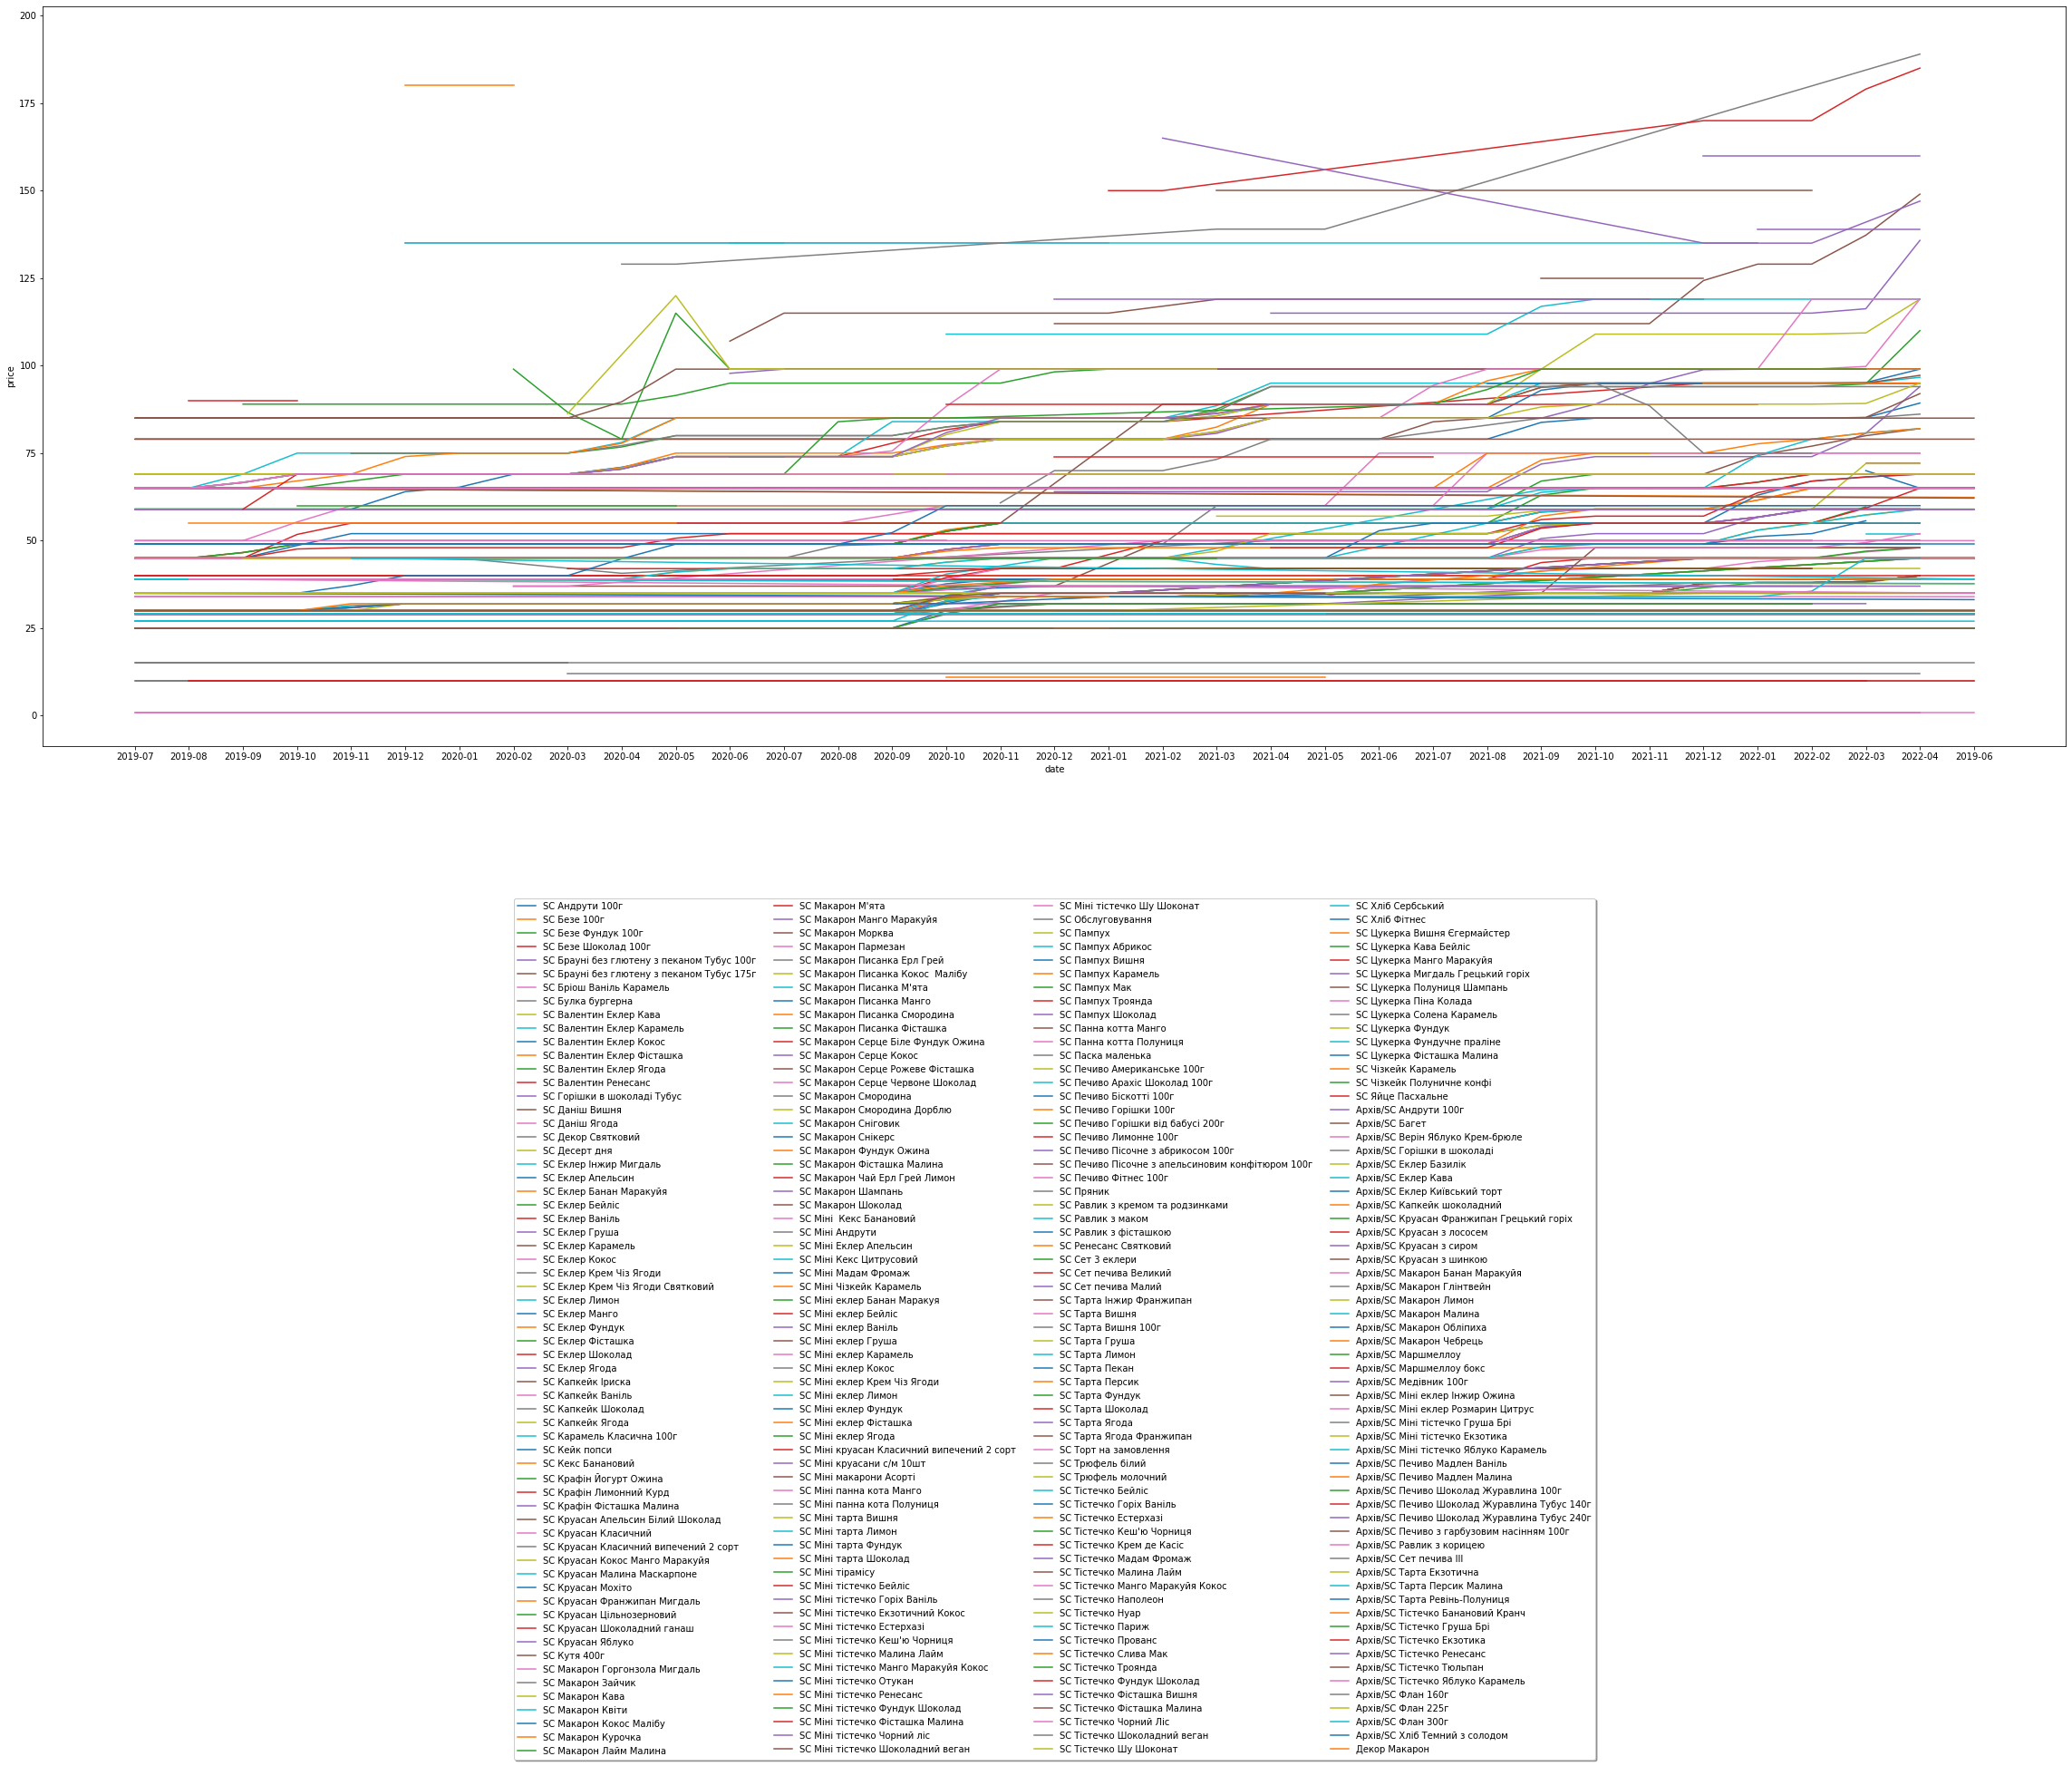

In [262]:
fig = plt.figure(figsize=(40, 15))
for i in task1_df.groupby(['GoodName']):
    plt.plot(i[1].YearMonth,i[1].RetailPrice,label=i[0])

plt.legend(loc='upper center',
           bbox_to_anchor=(0.5, -0.2),
           fancybox=True,
           shadow=True,
           ncol=4)
plt.xlabel('date')
plt.ylabel('price')
plt.show()

In [253]:
df_1

,Date,GoodID,GoodName,GoodParent,RetailPrice,UnitOfMeasurement,Department,Quantity,SumOfSale,Cost,DateStr,Day,Year,Month,YearMonth
26926,2019-06-01,BI-00000042,SC Міні еклер Фісташка,SC Міні еклери,29.0,шт,Підрозділ SHOco (Сахарова),109.0,2653.75,830.27,2019-06-01,1,2019,6,2019-06
27007,2019-06-01,BI-00002666,SC Торт на замовлення,SC Святкові товари,1.0,шт,Підрозділ SHOco (Сахарова),3.0,6480.0,2286.99,2019-06-01,1,2019,6,2019-06
26927,2019-06-01,BI-00000044,SC Міні еклер Ягода,SC Міні еклери,25.0,шт,Підрозділ SHOco (Сахарова),20.0,580.0,71.23,2019-06-01,1,2019,6,2019-06
26924,2019-06-01,BI-00000039,SC Міні еклер Крем Чіз Ягоди,SC Міні еклери,29.0,шт,Підрозділ SHOco (Сахарова),69.0,1653.75,516.01,2019-06-01,1,2019,6,2019-06
26925,2019-06-01,BI-00000040,SC Міні еклер Лимон,SC Міні еклери,25.0,шт,Підрозділ SHOco (Сахарова),10.0,250.0,25.53,2019-06-01,1,2019,6,2019-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198107,2022-04-16,BI-00000135,SC Тістечко Нуар,SC Тістечка/Десерти,119.0,шт,Підрозділ SHOco (Курбаса),1.0,119.0,-,2022-04-16,16,2022,4,2022-04
198108,2022-04-16,BI-00000135,SC Тістечко Нуар,SC Тістечка/Десерти,119.0,шт,Підрозділ SHOco (Кульпарківська),3.0,357.0,-,2022-04-16,16,2022,4,2022-04
198109,2022-04-16,BI-00000137,SC Тістечко Фісташка Малина,SC Тістечка/Десерти,99.0,шт,Підрозділ SHOco (Сахарова),1.0,99.0,-,2022-04-16,16,2022,4,2022-04
198097,2022-04-16,BI-00000129,SC Тістечко Горіх Ваніль,SC Тістечка/Десерти,99.0,шт,Підрозділ SHOco (Сахарова),9.0,891.0,-,2022-04-16,16,2022,4,2022-04


In [255]:
df_1['Quantity'] = pd.to_numeric(df_1['Quantity'], errors = 'coerce')
task2_df = df_1[['Year', 'Month', 'YearMonth', 'GoodName', 'Quantity']].groupby(['Year', 'Month', 'YearMonth', 'GoodName']).sum()
task2_df = task2_df.reset_index()
task2_df = task2_df[task2_df["Quantity"] < 5000]

In [256]:
task2_df

,Year,Month,YearMonth,GoodName,Quantity
0,2019,6,2019-06,SC Безе 100г,8.36
1,2019,6,2019-06,SC Безе Фундук 100г,132.05
2,2019,6,2019-06,SC Безе Шоколад 100г,117.03
3,2019,6,2019-06,SC Декор Святковий,4.00
4,2019,6,2019-06,SC Еклер Інжир Мигдаль,419.00
...,...,...,...,...,...
3962,2022,4,2022-04,SC Цукерка Фундук,5.00
3963,2022,4,2022-04,SC Цукерка Фундучне праліне,5.00
3964,2022,4,2022-04,SC Цукерка Фісташка Малина,3.00
3965,2022,4,2022-04,SC Чізкейк Карамель,843.00


### Sales graph

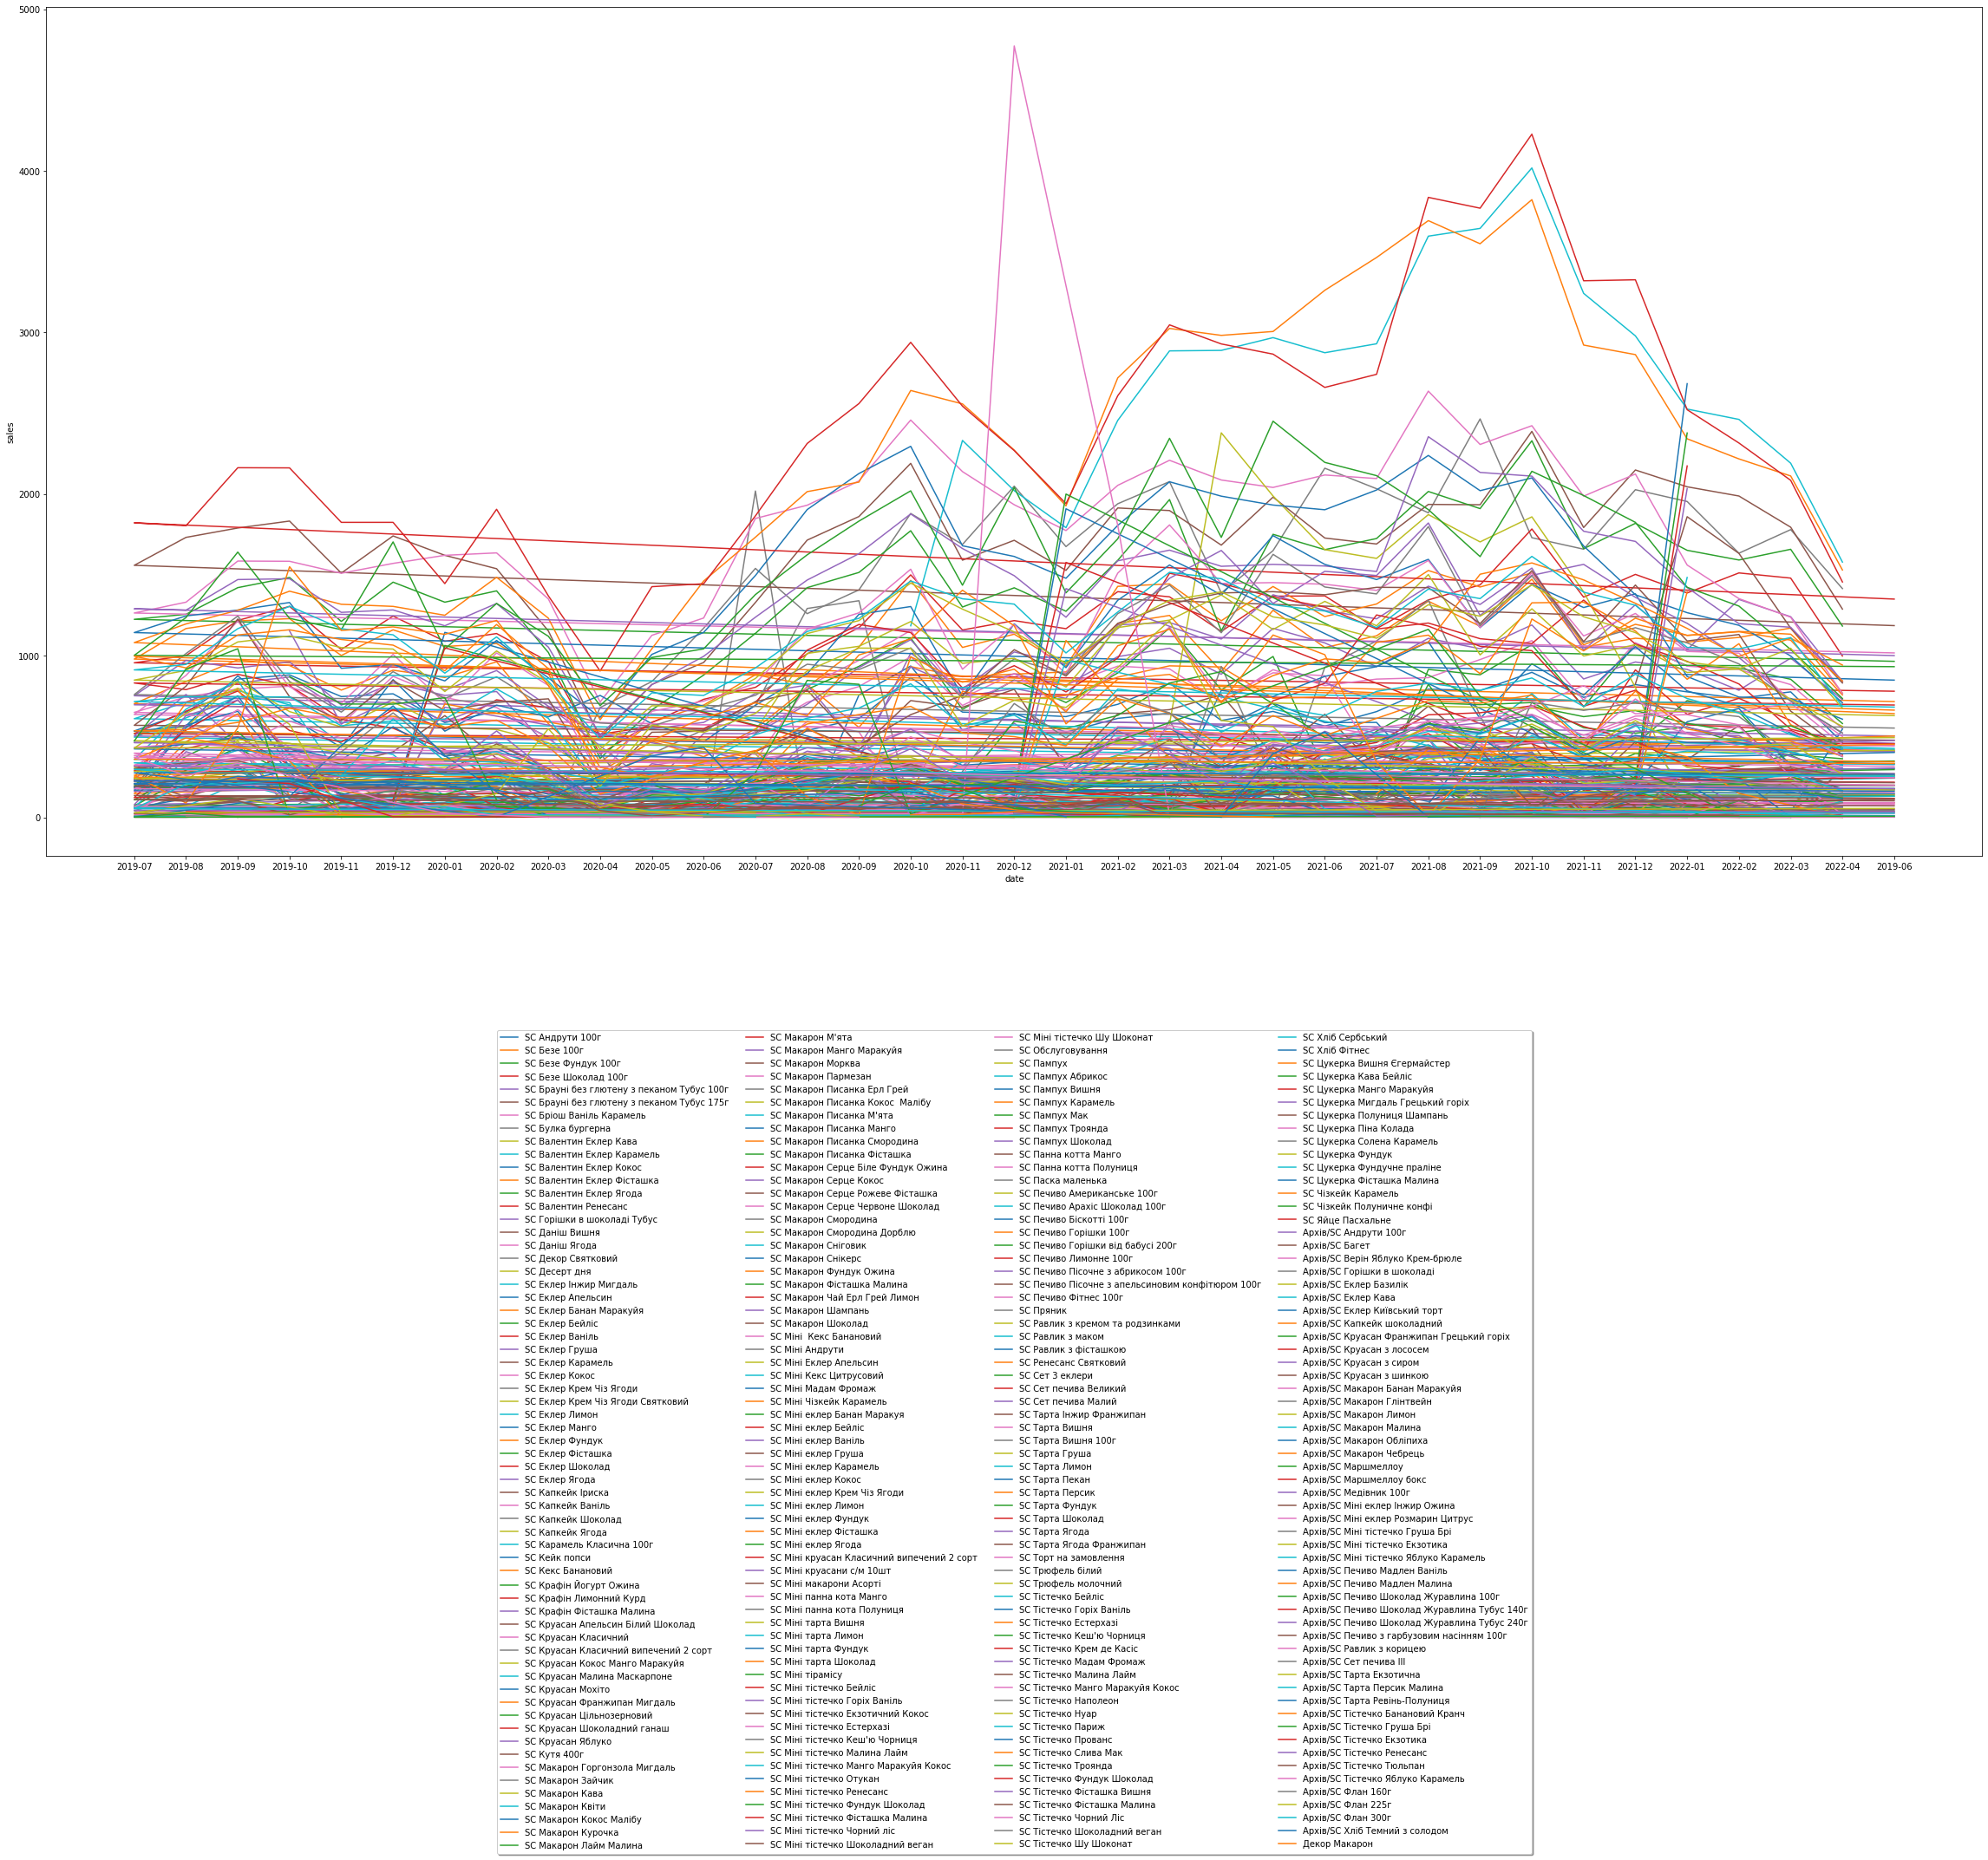

In [263]:
fig = plt.figure(figsize=(40, 18))
for i in task2_df.groupby('GoodName'):
    plt.plot(i[1].YearMonth,i[1].Quantity,label=i[0])

plt.legend(loc='upper center',
           bbox_to_anchor=(0.5, -0.2),
           fancybox=True,
           shadow=True,
           ncol=4)
plt.xlabel('date')
plt.ylabel('sales')
plt.show()